## 1.构建非线性数据集

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures


def standarlization(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std


def make_nonlinear_cla_data():
    num_points = 200
    x, y = make_circles(num_points, factor=0.5, noise=0.06, random_state=np.random.seed(10))
    x = x.reshape(-1, 2)
    x = standarlization(x)
    return x, y.reshape(-1, 1)


## 2.训练模型并可视化决策边界

In [5]:
def decision_boundary(x, y, pol):
    model = LogisticRegression()
    model.fit(x, y.ravel())
    print("Accuracy:", model.score(x, y))
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    x_new = np.hstack([xx.reshape(-1, 1), yy.reshape(-1, 1)])
    Z = model.predict(pol.transform(x_new))

    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(6, 5))
    plt.rcParams['ytick.direction'] = 'in'  # 刻度向内
    plt.rcParams['xtick.direction'] = 'in'  # 刻度向内
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    plt.pcolormesh(xx, yy, Z, alpha=0.1, shading='auto')

    neg, pos = [], []
    for i in range(len(x)):
        if y[i] == 0:
            neg.append(x[i, :])
        else:
            pos.append(x[i, :])
    neg, pos = np.vstack(neg), np.vstack(pos)

    plt.scatter(neg[:, 0], neg[:, 1], c='black', marker='s', s=40)
    plt.scatter(pos[:, 0], pos[:, 1], c='black', marker='o', s=40)
    plt.tight_layout()
    plt.show()

## 3.运行结果

Accuracy: 1.0


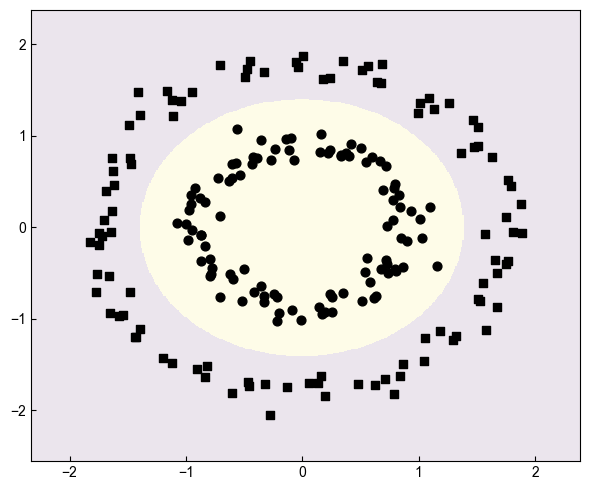

In [6]:
if __name__ == '__main__':
    x, y = make_nonlinear_cla_data()
    pol = PolynomialFeatures(degree=2, include_bias=False)
    x_pol = pol.fit_transform(x)

    decision_boundary(x_pol, y, pol)